In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlretrieve
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)
import scipy.stats
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import VotingRegressor

In [2]:
url="https://assets.datacamp.com/production/course_5977/datasets/recruitment_data.csv"
urlretrieve(url,"recuitment_data.csv")
recuitment_data=pd.read_csv("recuitment_data.csv")
recuitment_data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
url="https://assets.datacamp.com/production/course_5977/datasets/survey_data_2.csv"
urlretrieve(url,"survey_data_2.csv")
survey_data_2=pd.read_csv("survey_data_2.csv")
survey_data_2.head()

,year,employee_id,engagement
0,2016,1,3
1,2017,1,3
2,2016,2,3
3,2017,2,3
4,2016,4,3


In [4]:
recuitment_data.shape

(446, 4)

In [5]:
recuitment_data.isnull().sum()/len(recuitment_data)

attrition             0.000000
performance_rating    0.000000
sales_quota_pct       0.000000
recruiting_source     0.459641
dtype: float64

In [19]:
# treating missing data
recuitment_data['recruiting_source']=recuitment_data['recruiting_source'].fillna(recuitment_data['recruiting_source'].mode())

# 1.Identifying the best recruiting source

In [7]:
recuitment_data['recruiting_source'].value_counts()

Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: recruiting_source, dtype: int64

In [8]:
recuitment_data['attrition'].mean() #attrition rate =attrition(left organisation here is 1)/ total headcount (95/351)

0.21300448430493274

In [9]:
recuitment_data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [10]:
avg_sales_quota=recuitment_data.sales_quota_pct.mean()
avg_sales_quota

1.0826067312937224

In [13]:
# Sales numbers by recruiting source
avg_sales=recuitment_data.groupby(by='recruiting_source')['sales_quota_pct'].mean()
print(avg_sales)

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64


In [14]:
#Attrition rates by recruiting source
avg_attrition=recuitment_data.groupby(by='recruiting_source')['attrition'].mean()
avg_attrition

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

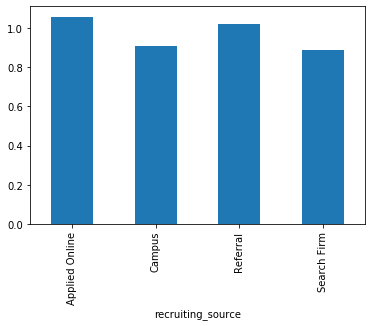

In [15]:
# Visualizing the sales performance differences
avg_sales.plot(kind='bar')

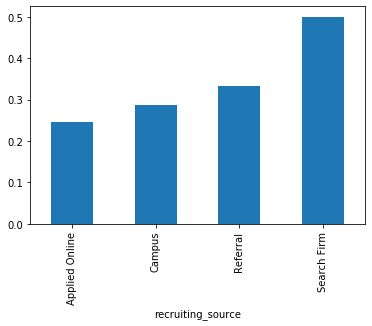

In [16]:
#Visualizing the attrition differences
avg_attrition.plot(kind='bar')

# So the conclusion from this analysis is keeping both avg attrition and avg sales Best:Applied online and Worst:search firm

# 2.Analyzing employee engagement

In [50]:
url="https://assets.datacamp.com/production/course_5977/datasets/survey_data.csv"
urlretrieve(url,"survey.csv")
survey=pd.read_csv("survey.csv")
survey.head()

,employee_id,department,engagement,salary,vacation_days_taken
0,1,Sales,3,103263.63550,7
1,2,Engineering,3,80708.64104,12
2,4,Engineering,3,60737.04786,12
3,5,Engineering,3,99116.32328,7
4,7,Engineering,3,51021.64386,18


In [34]:
survey.isna().sum()/len(survey)

employee_id            0.0
department             0.0
engagement             0.0
salary                 0.0
vacation_days_taken    0.0
dtype: float64

In [22]:
survey.department.value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [36]:
# average engagement score for each department
avg_engag=survey.engagement.mean()
avg_engag

3.050340136054422

In [51]:
disenage=survey[survey.engagement <=3]
disenage.head()

,employee_id,department,engagement,salary,vacation_days_taken
0,1,Sales,3,103263.63550,7
1,2,Engineering,3,80708.64104,12
2,4,Engineering,3,60737.04786,12
3,5,Engineering,3,99116.32328,7
4,7,Engineering,3,51021.64386,18


In [52]:
survey_sum=survey.groupby('department')['engagement','salary','vacation_days_taken'].mean()
survey_sum

,engagement,salary,vacation_days_taken
department,,,
Engineering,3.150884,73576.347157,12.204995
Finance,3.238095,76651.664255,11.476190
Sales,2.807175,75073.569865,9.224215


In [53]:
disenage_sum=disenage.groupby('department')['engagement','salary','vacation_days_taken'].mean()
disenage_sum

,engagement,salary,vacation_days_taken
department,,,
Engineering,2.597464,73621.245355,12.491284
Finance,2.585366,75095.562509,12.097561
Sales,2.418994,75294.558537,9.136872


# Checking Statistical Significant-Disenage Employee

In [61]:
survey_sales=pd.crosstab(survey['salary'],survey['department'])
survey_sales

department,Engineering,Finance,Sales
salary,,,
45529.69024,1,0,0
45714.06616,0,1,0
46112.04272,1,0,0
46133.67358,0,0,1
46170.57689,0,0,1
...,...,...,...
139875.48480,1,0,0
143105.47380,0,0,1
143203.18740,1,0,0


In [75]:
from scipy.stats import chi2_contingency,ttest_ind
chi2_stat, p_val, dof, ex = chi2_contingency(survey_sales)
print("chi stats={0}, Pvalue={1}, Degree of freedom={2}".format(chi2_stat, p_val, dof))

chi stats=2940.0000000000005, Pvalue=0.4861269458956553, Degree of freedom=2938


In [76]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Checking Statistical Significant-Vacation Day

In [95]:
t2, p2=ttest_ind(a=(survey['department']=='Sales'),b=survey['vacation_days_taken'])
print("test_statistcal={0}, Pvalue={1}".format(t2, p2))

test_statistcal=-60.03857827437944, Pvalue=0.0


In [96]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# 3.Are new hires getting paid too much?

In [32]:
url="https://assets.datacamp.com/production/course_5977/datasets/fair_pay_data.csv"
urlretrieve(url,"fair_pay_data.csv")
pay=pd.read_csv("fair_pay_data.csv")
pay.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [ ]:
pay.isna().sum()

In [ ]:
pay.job_level.value_counts()

In [ ]:
pay['new_hire']=pay['new_hire'].map({'Yes':1,'No':0})

In [ ]:
pay.groupby('new_hire')['salary'].mean()

In [ ]:
t2, p2 = stats.ttest_ind(pay['new_hire'],pay['salary'])

In [ ]:
t2

In [ ]:
p2

In [ ]:
pay_grouped=pay.groupby(['new_hire','job_level'])['salary'].mean()
pay_grouped

In [ ]:
sns.barplot(x='new_hire',y='salary',data=pay,hue='job_level')

In [ ]:
pay_filter=pay[pay['job_level']=='Hourly']
pay_filter

In [ ]:
t2, p2 = stats.ttest_ind(pay_filter['salary'],pay_filter['new_hire'])

In [ ]:
t2   #no significat proof

In [ ]:
X=pay.drop(['salary','employee_id'],axis=1)
y=pay.salary

# 4.Are performance ratings being given consistently?

In [101]:
url="https://assets.datacamp.com/production/course_5977/datasets/performance_data.csv"
urlretrieve(url,"performance_data.csv")
performance_data=pd.read_csv("performance_data.csv")
performance_data.head()

,employee_id,rating
0,1,4
1,2,4
2,4,4
3,5,4
4,7,2


In [102]:
url="https://assets.datacamp.com/production/course_5977/datasets/hr_data.csv"
urlretrieve(url,"hr_data.csv")
hr_data=pd.read_csv("hr_data.csv")
hr_data.head()

,employee_id,department,job_level,gender
0,1,Sales,Salaried,Female
1,2,Engineering,Hourly,Female
2,4,Engineering,Hourly,Female
3,5,Engineering,Salaried,Male
4,7,Engineering,Hourly,Male


In [103]:
joined_data=performance_data.merge(hr_data,on='employee_id')
joined_data.head()

,employee_id,rating,department,job_level,gender
0,1,4,Sales,Salaried,Female
1,2,4,Engineering,Hourly,Female
2,4,4,Engineering,Hourly,Female
3,5,4,Engineering,Salaried,Male
4,7,2,Engineering,Hourly,Male


In [126]:
joined_data.rating.value_counts()

3    490
2    432
4    298
1    154
5     96
Name: rating, dtype: int64

In [104]:
gender_grouped=joined_data.groupby('gender')['rating'].mean()
gender_grouped

gender
Female    2.745740
Male      2.920792
Name: rating, dtype: float64

In [118]:
performance=joined_data[joined_data['rating']>3]
performance.head()

,employee_id,rating,department,job_level,gender
0,1,4,Sales,Salaried,Female
1,2,4,Engineering,Hourly,Female
2,4,4,Engineering,Hourly,Female
3,5,4,Engineering,Salaried,Male
5,8,5,Engineering,Salaried,Female


In [119]:
# Testing whether one gender is more likely to be a high performer
gender_test=pd.crosstab(performance.gender,performance.rating)
gender_test

rating,4,5
gender,,
Female,125,39
Male,173,57


In [120]:
chi2_stat, p_val, dof, ex = chi2_contingency(gender_test)
print("chi stats={0}, Pvalue={1}, Degree of freedom={2}".format(chi2_stat, p_val, dof))

chi stats=0.011961735373207926, Pvalue=0.9129092506018411, Degree of freedom=1


In [121]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


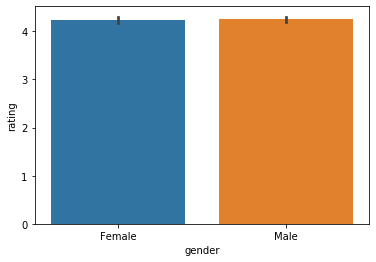

In [128]:
# Visualizing the distribution of all ratings by gender
sns.barplot(x=performance['gender'],y=performance['rating'])

In [130]:
performance.job_level.value_counts()

Hourly      182
Salaried    130
Manager      82
Name: job_level, dtype: int64

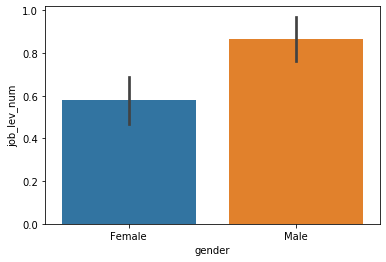

In [134]:
# Visualizing the distribution of job_level by gender
performance['job_lev_num']=performance['job_level'].map({'Hourly':0,'Salaried':1,'Manager':2})
sns.barplot(x=performance['gender'],y=performance['job_lev_num'])

In [135]:
# Testing whether men and women have different job level distributions
diff_job_level=pd.crosstab(performance.gender,performance.job_lev_num)

chi2_stat, p_val, dof, ex = chi2_contingency(diff_job_level)
print("chi stats={0}, Pvalue={1}, Degree of freedom={2}".format(chi2_stat, p_val, dof))

chi stats=13.281798743893779, Pvalue=0.0013058522686485218, Degree of freedom=2


In [136]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [ ]:
# Visualizing the distribution of high_performer by gender, faceted by job level



# 5.Employee Safety Analysis

In [137]:
url="https://assets.datacamp.com/production/course_5977/datasets/accident_data.csv"
urlretrieve(url,"accident_data.csv")
accident=pd.read_csv("accident_data.csv")
accident.head()

,year,employee_id,accident_type
0,2017,1,Mild
1,2017,4,Mild
2,2017,11,Mild
3,2017,19,Mild
4,2017,22,Mild


In [138]:
url="https://assets.datacamp.com/production/course_5977/datasets/hr_data_2.csv"
urlretrieve(url,"hr_data_2.csv")
hr_data_2=pd.read_csv("hr_data_2.csv")
hr_data_2.head()

,year,employee_id,location,overtime_hours
0,2016,1,Northwood,14
1,2017,1,Northwood,8
2,2016,2,East Valley,8
3,2017,2,East Valley,11
4,2016,4,East Valley,4


In [155]:
hr_joined=hr_data_2.merge(accident,on='employee_id',how='left')
hr_joined.head()

,year_x,employee_id,location,overtime_hours,year_y,accident_type
51,2017,32,West River,6,NaN,NaN
52,2016,33,Northwood,0,NaN,NaN
53,2017,33,Northwood,7,NaN,NaN
54,2016,35,West River,18,NaN,NaN
55,2017,35,West River,5,NaN,NaN
56,2016,36,Southfield,1,NaN,NaN
57,2017,36,Southfield,7,NaN,NaN
58,2016,38,Southfield,5,2016.0,Moderate
59,2017,38,Southfield,6,2016.0,Moderate
60,2016,39,West River,6,NaN,NaN


In [157]:
hr_joined.isna().sum()

year_x               0
employee_id          0
location             0
overtime_hours       0
year_y            2370
accident_type     2370
dtype: int64

In [158]:
hr_joined.accident_type.value_counts()

Mild        446
Moderate    136
Severe       22
Name: accident_type, dtype: int64

In [162]:
hr_joined['accident_type']=hr_joined['accident_type'].fillna(hr_joined['accident_type'].mode()[0])
hr_joined['year_y']=hr_joined['year_y'].fillna(hr_joined['year_y'].mode()[0])
hr_joined.head()

,year_x,employee_id,location,overtime_hours,year_y,accident_type
0,2016,1,Northwood,14,2017.0,Mild
1,2017,1,Northwood,8,2017.0,Mild
2,2016,2,East Valley,8,2017.0,Mild
3,2017,2,East Valley,11,2017.0,Mild
4,2016,4,East Valley,4,2017.0,Mild


In [164]:
hr_joined['had_accident']=hr_joined['accident_type'].map({'Mild':0,'Moderate':1,'Severe':2})
#hr_joined['had_accident']=hr_joined['had_accident'].fillna(0)
#hr_joined['had_accident']=hr_joined['had_accident'].astype(int)
#hr_joined.head()

In [166]:
#Highest Accident rate
accident_rate=hr_joined.groupby('year_x')['had_accident'].mean()
accident_rate

year_x
2016    0.060525
2017    0.060525
Name: had_accident, dtype: float64

In [167]:
#location of accident rate
place_accident=hr_joined.groupby('location')['had_accident'].mean()
place_accident

location
East Valley    0.083333
Northwood      0.040541
Southfield     0.078431
West River     0.044834
Name: had_accident, dtype: float64

In [171]:
# Where did the accident rate increase most?
year_accident=hr_joined.groupby(['location','year_x'])['had_accident'].mean()
year_accident

location     year_x
East Valley  2016      0.083333
             2017      0.083333
Northwood    2016      0.040541
             2017      0.040541
Southfield   2016      0.078431
             2017      0.078431
West River   2016      0.044834
             2017      0.044834
Name: had_accident, dtype: float64

In [172]:
year_accident=hr_joined.pivot_table(index=['location','year_x'],values='had_accident',aggfunc=np.mean)
year_accident

had_accident
location    year_x              
East Valley 2016        0.083333
            2017        0.083333
Northwood   2016        0.040541
            2017        0.040541
Southfield  2016        0.078431
            2017        0.078431
West River  2016        0.044834
            2017        0.044834

In [176]:
# Checking in east valley
east_valley=hr_joined[hr_joined['location']=='East Valley']
east_valley.head()

,year_x,employee_id,location,overtime_hours,year_y,accident_type,had_accident
2,2016,2,East Valley,8,2017.0,Mild,0
3,2017,2,East Valley,11,2017.0,Mild,0
4,2016,4,East Valley,4,2017.0,Mild,0
5,2017,4,East Valley,2,2017.0,Mild,0
14,2016,11,East Valley,4,2017.0,Mild,0


In [177]:
east_valley=east_valley.groupby('year_x')['overtime_hours'].mean()
east_valley

year_x
2016    8.854839
2017    8.846774
Name: overtime_hours, dtype: float64

In [178]:
east_valley=hr_joined.pivot_table(index=['year_x'],values='overtime_hours',aggfunc=np.mean)
east_valley

,overtime_hours
year_x,
2016,9.127102
2017,9.573638


In [181]:
#ttest_ind(east_valley['overtime_hours'],east_valley['year_x'])